# 01: EDA and Preprocessing

## Objectives

- Load CSV; confirm shape; inspect columns; understand units.
- Check missingness (per column, per row), basic stats, skewness.
- Decide on: log1p for long tails, median impute, and scaling choice (StandardScaler or RobustScaler).
# Kaggle Configuration (optional)
KAGGLE_USERNAME="franciscotbarbosa"
KAGGLE_KEY="9c3baae82cd3d5648f497ef9dfd40b56"# Kaggle Configuration (optional)
KAGGLE_USERNAME="franciscotbarbosa"
KAGGLE_KEY="9c3baae82cd3d5648f497ef9dfd40b56"# Kaggle Configuration (optional)
KAGGLE_USERNAME="franciscotbarbosa"
KAGGLE_KEY="9c3baae82cd3d5648f497ef9dfd40b56"# Kaggle Configuration (optional)
KAGGLE_USERNAME="franciscotbarbosa"
KAGGLE_KEY="9c3baae82cd3d5648f497ef9dfd40b56"!pi

In [1]:
# === TODO ===
# Load CSV from data/raw, show head(), dtypes, and missing value counts.
# Acceptance: printed shape and a table of NA counts sorted desc
import pandas as pd

path = "../data/raw/CC GENERAL.csv"

df = pd.read_csv(path)

print("First 5 records:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("Data shape:")
print(df.shape)

print("\nMissing value counts:")
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts)


df["CUST_ID"] = df["CUST_ID"].str.split("C", expand=True)[1]
df["CUST_ID"] = df["CUST_ID"].astype(int)
print(df.head())


First 5 records:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                  

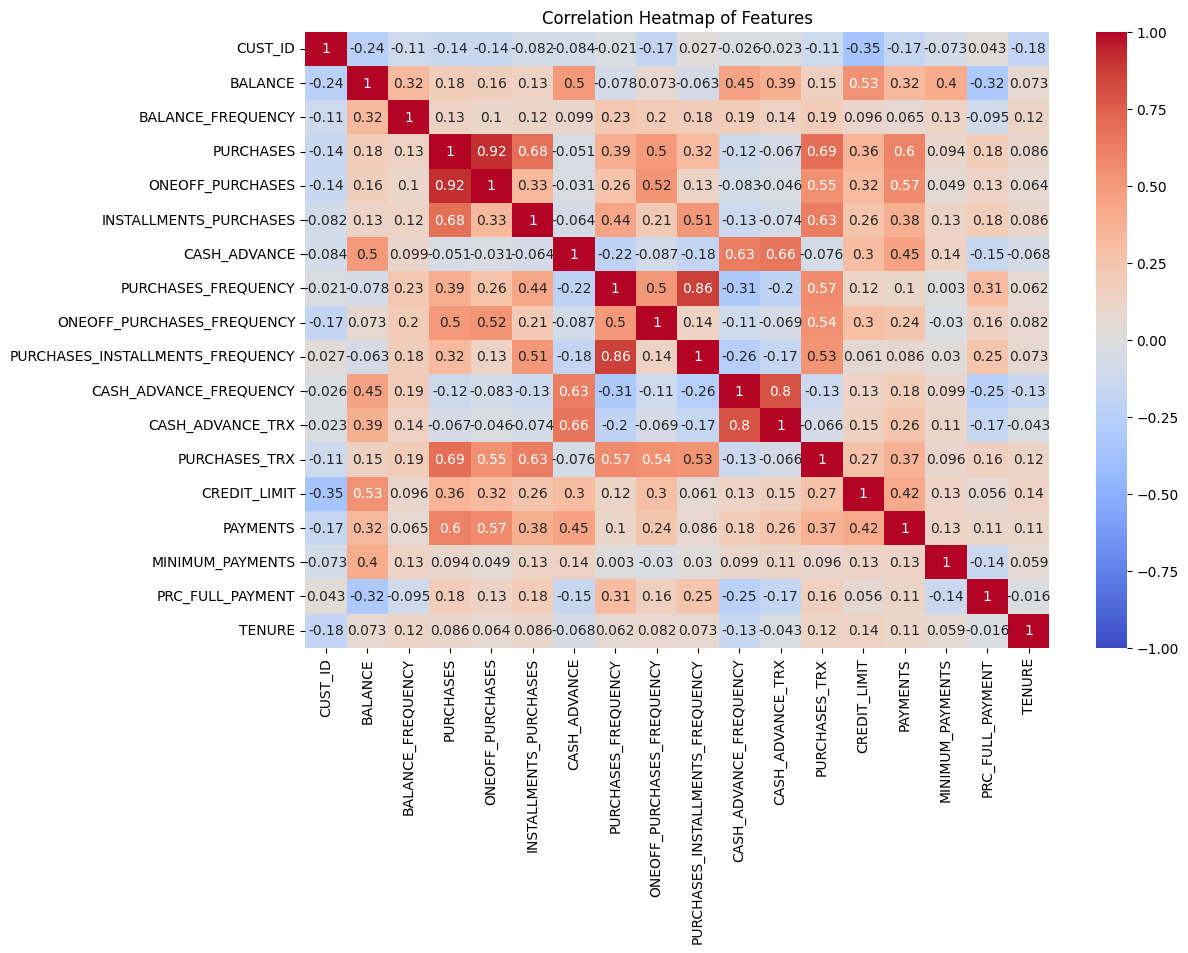

In [2]:
# === TODO ===
# Plot distributions and correlations for a subset of features.
# Hints: seaborn pairplot or histplot; sns.heatmap(corr, vmin=-1, vmax=1)
# Acceptance: at least 1 figure of distributions and 1 heatmap

from matplotlib import pyplot as plt
import seaborn as sns
import os

correlation_matrix = df.corr()

os.makedirs("../images", exist_ok=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.savefig('../images/correlation_heatmap.png')
plt.show()


In [4]:
# === TODO ===
# Implement your chosen cleaning in src.prep.basic_clean and apply it here.
# Hints: median impute with df.fillna(df.median()), clip outliers, optional log1p on skewed cols
# Acceptance: no missing values remain; you print skewness before/after for 3 features
import sys
import os

# Fix: __file__ is not defined in notebooks, use os.getcwd() instead
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.prep import basic_clean

# Before cleaning   
print("Skewness before cleaning:")
print(df.skew())

df = basic_clean(df)

# After cleaning
print("\nSkewness after cleaning:")
print(df.skew())

# After cleaning, print summary
skew_after = df.skew()
print("\n=== Skewness Quality Check ===")
print(f"Features with |skew| < 0.5 (excellent): {(abs(skew_after) < 0.5).sum()}")
print(f"Features with |skew| < 1.0 (good): {(abs(skew_after) < 1.0).sum()}")
print(f"Features with |skew| > 2.0 (needs attention): {(abs(skew_after) > 2.0).sum()}")

# Check MINIMUM_PAYMENTS specifically
print(f"\nMINIMUM_PAYMENTS: {skew_after['MINIMUM_PAYMENTS']:.2f}")
if abs(skew_after['MINIMUM_PAYMENTS']) < 0.5:
    print("✅ Excellent - ready for clustering!")
elif abs(skew_after['MINIMUM_PAYMENTS']) < 1.0:
    print("✅ Good - acceptable for clustering")
else:
    print("⚠️ May need additional transformation")


Skewness before cleaning:
CUST_ID                            -0.000828
BALANCE                            -0.864566
BALANCE_FREQUENCY                  -2.196282
PURCHASES                          -0.777368
ONEOFF_PURCHASES                    0.176133
INSTALLMENTS_PURCHASES             -0.033565
CASH_ADVANCE                        0.258510
PURCHASES_FREQUENCY                -0.089637
ONEOFF_PURCHASES_FREQUENCY          1.290617
PURCHASES_INSTALLMENTS_FREQUENCY    0.373620
CASH_ADVANCE_FREQUENCY              1.384136
CASH_ADVANCE_TRX                    0.884052
PURCHASES_TRX                       0.000085
CREDIT_LIMIT                       -0.057175
PAYMENTS                           -1.833254
MINIMUM_PAYMENTS                    0.358818
PRC_FULL_PAYMENT                    1.746046
TENURE                             -3.170222
dtype: float64

Skewness after cleaning:
CUST_ID                            -0.000828
BALANCE                            -2.148151
BALANCE_FREQUENCY                

In [7]:
# === TODO ===
# Create standardized matrix X_ready for clustering.
# Hints: from sklearn.preprocessing import StandardScaler or RobustScaler; fit on the whole set (unsupervised)
# Acceptance: X_ready has zero mean ~0 and unit variance ~1 (check with np.mean/std)
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_ready = scaler.fit_transform(df)

print(f"X_ready mean: {np.mean(X_ready)}")
print(f"X_ready std: {np.std(X_ready)}")

# Acceptance: X_ready has zero mean ~0 and unit variance ~1 (check with np.mean/std)
# For StandardScaler:
# - Mean should be close to 0 (within 0.0001)
# - Std should be close to 1.0 (within 0.0001)

print("======== SCALER CHECK =========")
mean_check = abs(np.mean(X_ready)) < 0.0001
std_check = abs(np.std(X_ready) - 1.0) < 0.0001

if mean_check and std_check:
    print("✅ X_ready is properly scaled")
    print(f"   Mean: {np.mean(X_ready):.2e} (should be ~0)")
    print(f"   Std: {np.std(X_ready):.6f} (should be ~1.0)")
else:
    print("⚠️ X_ready is not properly scaled")
    print(f"   Mean: {np.mean(X_ready):.2e} (expected: ~0)")
    print(f"   Std: {np.std(X_ready):.6f} (expected: ~1.0)")
print("======== SCALER CHECK =========")

X_ready mean: 1.975935106272656e-16
X_ready std: 1.0
======== SCALER CHECK =========
✅ X_ready is properly scaled
   Mean: 1.98e-16 (should be ~0)
   Std: 1.000000 (should be ~1.0)
======== SCALER CHECK =========
